In [6]:
using Revise

using Amaru

In [7]:
# Mesh generation
blocks = [
    Block2D( [0 0; 3 0.4], nx=30, ny=8, shape=QUAD8),
]

msh = Mesh(blocks, verbose=true);

Mesh generation:
  analyzing 1 block(s)
  2D mesh             
    797 points obtained
    240 cells obtained
     76 faces obtained
     76 surface edges obtained
  done.


In [15]:
msh.cells[3].points[4]

FemMesh.Point with:
  x: Float64 0.19999999999999996
  y: Float64 0.05
  z: Float64 0.0
  tag: Int64 0
  id: Int64 18
  extra: Int64 -1

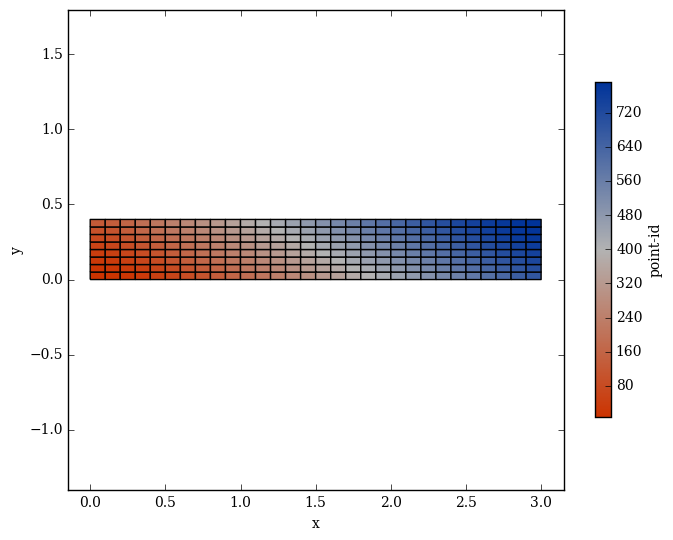

In [3]:
Amaru.mplot(msh, field="point-id")

In [16]:
# Finite element modeling

materials = [
    MaterialBind(:solids, ElasticSolid(E=100.0, nu=0.2) ),
]

loggers = [
    Logger(:node, :(x==1.5 && y==0)) # log node that match condition
    GroupLogger(:ip, :(y<0.025)) # log a group of IPs that match condition
];


In [17]:
# Finite element domain
domain = Domain(msh, materials, loggers, model_type=:plane_stress);

# List of boundary conditions
bcs = [
    BC(:node, :(x==0 && y==0), :(ux=0, uy=0) ),
    BC(:node, :(x==3 && y==0), :(uy=0) ),
    BC(:face, :(y==0.4), :(ty=-0.1*x) ),
]

# Perform the finite element analysis
solve!(domain, bcs, nincs=10, verbose=true)

save(domain, "dom1.vtk")

Domain setup:
  2D domain plane_stress model      
    797 nodes
    240 elements
     76 edges
      1 materials
      2 loggers
  done.
FEM analysis:
  unknown dofs: 1591
  increment 1 from t=0.0 to t=0.1 (dt=0.1):
    it 1   residue: 4.9002e+00
    it 2   residue: 3.9776e+00
    it 3   residue: 1.1984e+00
    it 4   residue: 1.2387e+00
    it 5   residue: 1.3212e+00
solve!: solver did not converge
  file dom1.vtk written (Domain)


In [18]:
loggers[1].table

DTable 1x7:
  row   x    y    z    ux   fx   uy   fy
 1     1.5  0.0  0.0  0.0  0.0  0.0  0.0

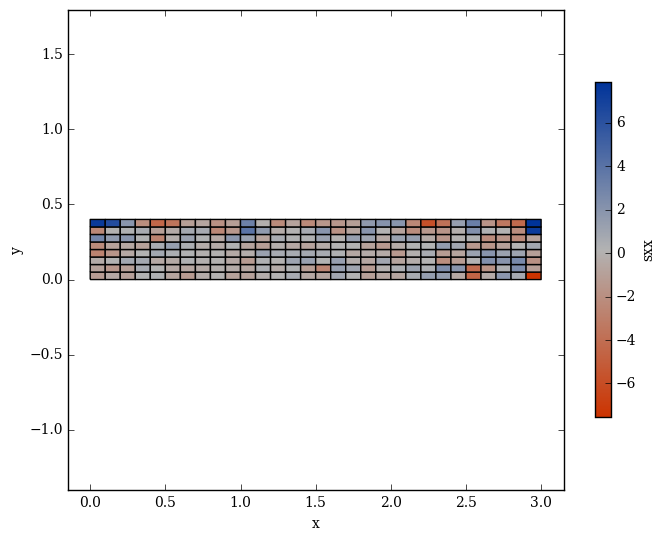

In [19]:
Amaru.mplot(domain, field="sxx", warpscale=1)

In [20]:
node_data = loggers[1].table

DTable 1x7:
  row   x    y    z    ux   fx   uy   fy
 1     1.5  0.0  0.0  0.0  0.0  0.0  0.0

In [21]:
using PyPlot
rc("font", family="serif", size=10)

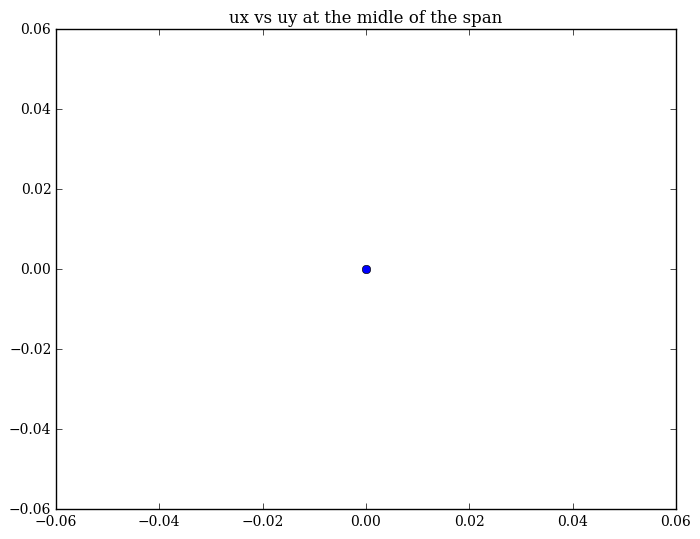

PyObject <matplotlib.text.Text object at 0x7f925c2de3c8>

In [22]:
plot(node_data[:ux], node_data[:uy], "o-")
title("ux vs uy at the midle of the span")

In [23]:
ips_data = loggers[2].book
#save(loggers[2].book, "book.dat")

DBook (tables=1):
  DTable 60x11:
     row   szz   sxx   eyy   x          z    ezz   syy   exy   y          exx   sxy
    1     0.0   0.0   0.0   0.0211325  0.0  0.0   0.0   0.0   0.0105662  0.0   0.0 
    2     0.0   0.0   0.0   0.0788675  0.0  0.0   0.0   0.0   0.0105662  0.0   0.0 
    3     0.0   0.0   0.0   0.121132   0.0  0.0   0.0   0.0   0.0105662  0.0   0.0 
    4     0.0   0.0   0.0   0.178868   0.0  0.0   0.0   0.0   0.0105662  0.0   0.0 
    5     0.0   0.0   0.0   0.221132   0.0  0.0   0.0   0.0   0.0105662  0.0   0.0 
    6     0.0   0.0   0.0   0.278868   0.0  0.0   0.0   0.0   0.0105662  0.0   0.0 
    7     0.0   0.0   0.0   0.321132   0.0  0.0   0.0   0.0   0.0105662  0.0   0.0 
    8     0.0   0.0   0.0   0.378868   0.0  0.0   0.0   0.0   0.0105662  0.0   0.0 
    9     0.0   0.0   0.0   0.421132   0.0  0.0   0.0   0.0   0.0105662  0.0   0.0 
   10     0.0   0.0   0.0   0.478868   0.0  0.0   0.0   0.0   0.0105662  0.0   0.0 
   11     0.0   0.0   0.0   0.521132   0.0

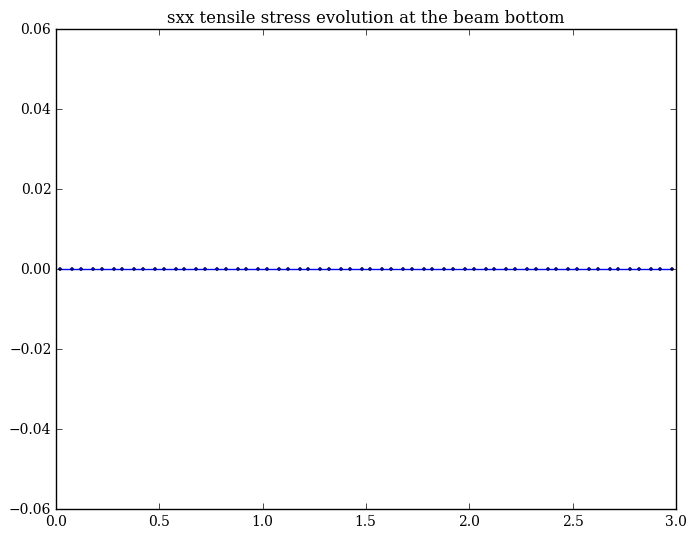

PyObject <matplotlib.text.Text object at 0x7f925c3c3940>

In [24]:
for table in ips_data.tables
    plot(table[:x], table[:sxx], "o-", ms=2);
end
title("sxx tensile stress evolution at the beam bottom")